In [42]:
import os
import sys
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import warnings
warnings.filterwarnings("ignore")

### Setting up Dataset for EDA

`Default_Fin.csv` This is a synthetic dataset created using actual data from a financial institution. The data has been modified to remove identifiable features and the numbers transformed to ensure they do not link to original source (financial institution).

This is intended to be used for academic purposes for beginners who want to practice financial analytics from a simple financial dataset

In this dataset. Following are the columns present:
- `index`: This is the serial number or unique identifier of the loan taker
- `Employed`: This is a Boolean 1= employed 0= unemployed
- `Bank Balance`: Bank Balance of the loan taker
- `Annul Salary`: Annual salary of the loan taker
- `Defaulted?`: This is a Boolean 1 = defaulted(means, created issue in loan payment)  0 = not defaulted

In [43]:
df = pd.read_csv('Default_Fin.csv')
df

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
...,...,...,...,...,...
9995,9996,1,8538.72,635908.56,0
9996,9997,1,9095.52,235928.64,0
9997,9998,1,10144.92,703633.92,0
9998,9999,1,18828.12,440029.32,0


### Preparing Dataset

In [44]:
df.head(6)

,Index,Employed,Bank Balance,Annual Salary,Defaulted?
0,1,1,8754.36,532339.56,0
1,2,0,9806.16,145273.56,0
2,3,1,12882.60,381205.68,0
3,4,1,6351.00,428453.88,0
4,5,1,9427.92,461562.00,0
5,6,0,11035.08,89898.72,0


In [45]:
df.columns

Index(['Index', 'Employed', 'Bank Balance', 'Annual Salary', 'Defaulted?'], dtype='object')

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Index          10000 non-null  int64  
 1   Employed       10000 non-null  int64  
 2   Bank Balance   10000 non-null  float64
 3   Annual Salary  10000 non-null  float64
 4   Defaulted?     10000 non-null  int64  
dtypes: float64(2), int64(3)
memory usage: 390.8 KB


##### Checking for missing data :


In [47]:
# Missing Value
df.isnull().sum()

Index            0
Employed         0
Bank Balance     0
Annual Salary    0
Defaulted?       0
dtype: int64

__There are no missing values.__

##### Checking for Duplicate Rows

In [48]:
df.duplicated().sum()

0

### Exploratory Data Analysis        

In [49]:
f_desc = round(df.describe().T, 2)
f_desc

,count,mean,std,min,25%,50%,75%,max
Index,10000.0,5000.50,2886.90,1.00,2500.75,5000.50,7500.25,10000.00
Employed,10000.0,0.71,0.46,0.00,0.00,1.00,1.00,1.00
Bank Balance,10000.0,10024.50,5804.58,0.00,5780.79,9883.62,13995.66,31851.84
Annual Salary,10000.0,402203.78,160039.67,9263.64,256085.52,414631.74,525692.76,882650.76
Defaulted?,10000.0,0.03,0.18,0.00,0.00,0.00,0.00,1.00


In [50]:
# Target Class
table = df['Defaulted?'].value_counts().reset_index()
table.columns = ['Status', 'Number']
table['Status'] = table['Status'].map({1 :'Defaulted', 0 :'Not defaulted'})
print(table)

          Status  Number
0  Not defaulted    9667
1      Defaulted     333


Text(0.5, 1.0, 'Number of people defaulted?')

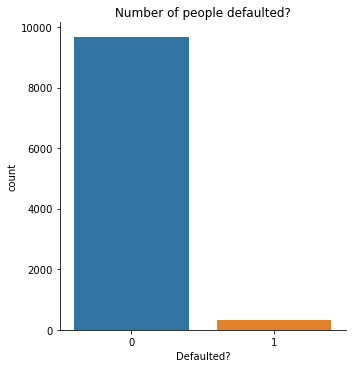

In [51]:
# Target Class
sns.catplot(x = 'Defaulted?', kind='count', data = df)
plt.title('Number of people defaulted?')

In [52]:
# 19020 data points with 4 features and 1 label column
df.shape

(10000, 5)

#### Histogram Distribution Plot

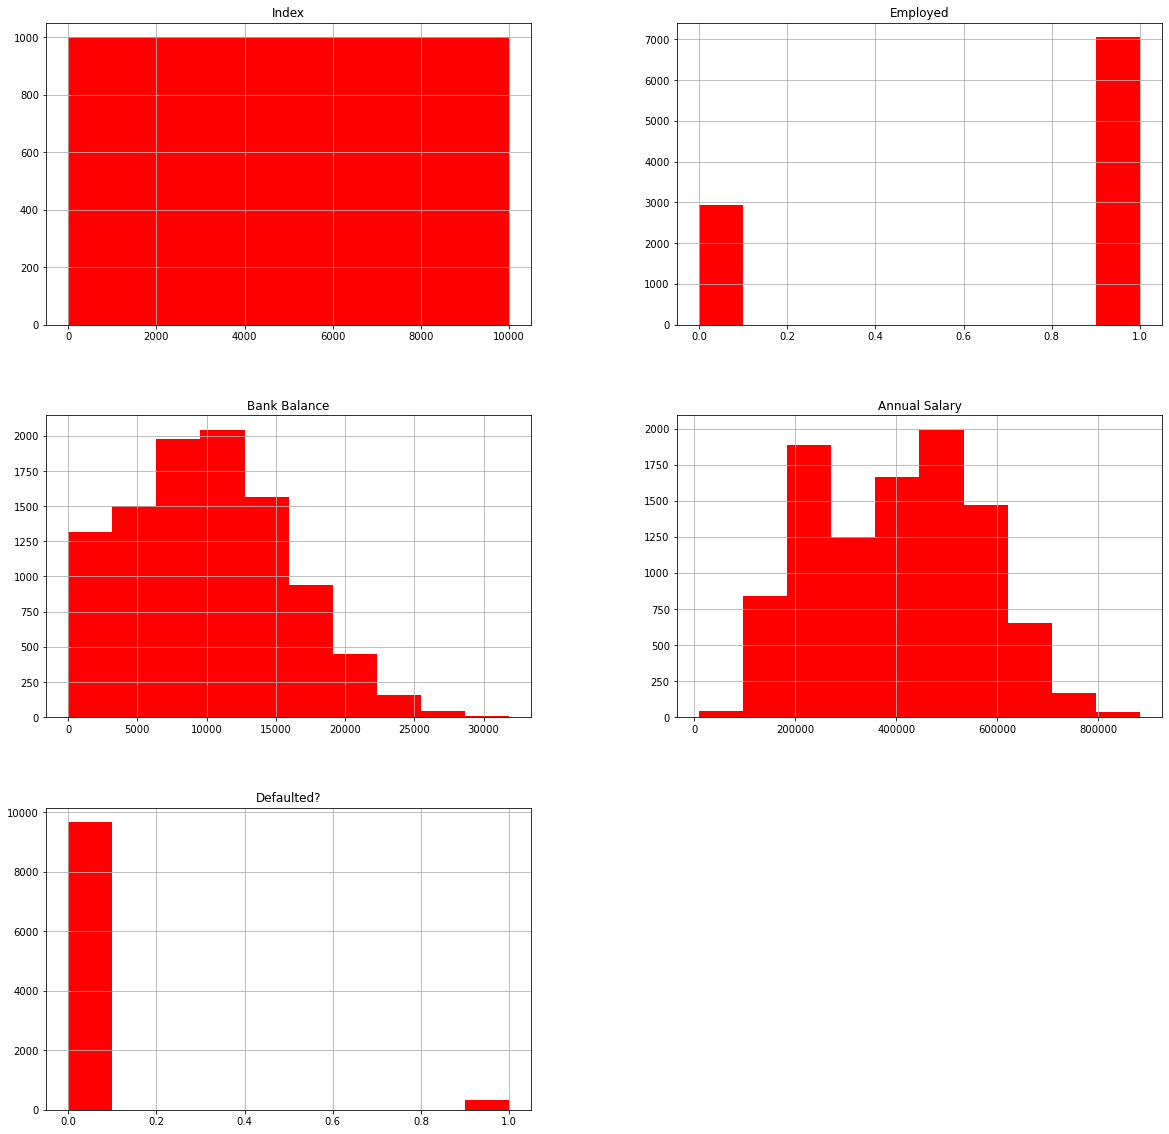

In [53]:
df.hist(figsize=(20,20), color='red')
plt.show()

##### Pair Plot

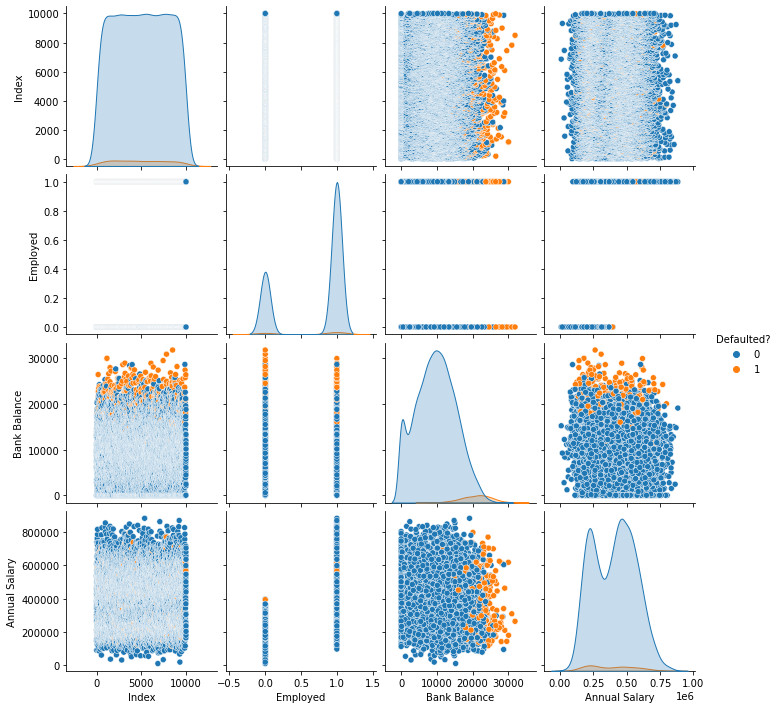

In [54]:
sns.pairplot(df, diag_kind='kde', hue = 'Defaulted?')

#### Correlation Plot

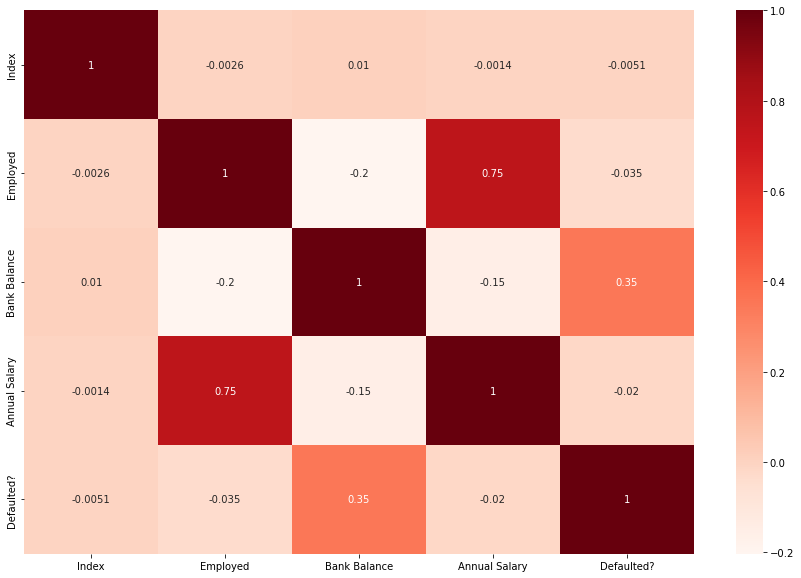

In [55]:
#Using Pearson Correlation
plt.figure(figsize=(15,10))
corr = df.corr()

sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()

##### Correlation Map

### Split Data into different Training and Test Dataset  (75% Training Data / 25% Test or validation Data)

In [56]:
X = df.drop(columns='Defaulted?')
y = df['Defaulted?']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)
print("Shape of X_train: ",X_train.shape)
print("Shape of X_test: ", X_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (7500, 4)
Shape of X_test:  (2500, 4)
Shape of y_train:  (7500,)
Shape of y_test (2500,)


#### Feature Scaling

In [57]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

### Upsampling by SMOTE

In the EDA part, we know that defaulted cases only take about 3% of the samples.

This imbalanced dataset may cause problem for classification models when they try to minimize the cost function.

So we introduce SMOTE upsampling method to rebablance the dataset.



In [58]:
X_train.shape, X_test.shape

((7500, 4), (2500, 4))

In [59]:
y_train.value_counts()

0    7255
1     245
Name: Defaulted?, dtype: int64

In [60]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=6)
X_train, y_train = sm.fit_resample(X_train, y_train)

In [61]:
X_train.shape, y_train.shape

((14510, 4), (14510,))

In [62]:
y_train.value_counts()


0    7255
1    7255
Name: Defaulted?, dtype: int64

### Logistic Regression

Cross Validation Score for Naive Bayes Model:  0.8866988283942108
Accuracy with Training data: 0.8867677463818057
Accuracy with test data: 0.874
Confusion Matrix for Naive Bayes Model: 
[[2109  303]
 [  12   76]]
Classification Report for Naive Bayes model: 
              precision    recall  f1-score   support

           0       0.99      0.87      0.93      2412
           1       0.20      0.86      0.33        88

    accuracy                           0.87      2500
   macro avg       0.60      0.87      0.63      2500
weighted avg       0.97      0.87      0.91      2500



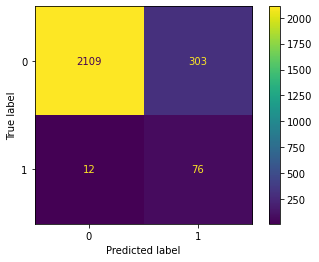

In [63]:
lr_model = LogisticRegression(solver='saga',random_state=6)
lr_model.fit(X_train, y_train)

cv_lr = cross_val_score(estimator=lr_model, X=X_train, y =y_train.ravel(), cv=10)
print("Cross Validation Score for Naive Bayes Model: ", cv_lr.mean())

lr_accuracy_train = accuracy_score(y_train, lr_model.predict(X_train))
print(f"Accuracy with Training data: {lr_accuracy_train}")

lr_y_pred = lr_model.predict(X_test)
lr_accuracy_test = accuracy_score(y_test, lr_y_pred)
print(f"Accuracy with test data: {lr_accuracy_test}")


print("Confusion Matrix for Naive Bayes Model: ")
cm_lr = confusion_matrix(y_test, lr_y_pred)
print(cm_lr)
print("Classification Report for Naive Bayes model: ")
print(classification_report(y_test, lr_y_pred))

disp = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=lr_model.classes_)
disp.plot()

tp_lr = cm_lr[0,0]
fp_lr = cm_lr[0,1]
tn_lr = cm_lr[1,1]
fn_lr = cm_lr[1,0]

### Random Forest Classifier model 

Cross Validation Score for RandomForest Classifier Model:  0.8995175740868367
Accuracy with Training data: 0.906685044796692
Accuracy with test data: 0.8812
Confusion Matrix for RandomForest Classifier Model: 
[[2130  282]
 [  15   73]]
Classification Report for RandomForest Classifier model: 
              precision    recall  f1-score   support

           0       0.99      0.88      0.93      2412
           1       0.21      0.83      0.33        88

    accuracy                           0.88      2500
   macro avg       0.60      0.86      0.63      2500
weighted avg       0.97      0.88      0.91      2500



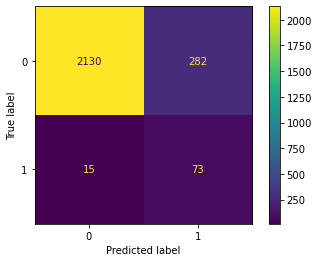

In [64]:
rf_model = RandomForestClassifier(
    n_estimators=500,
    max_depth=6,
    random_state=6,
    )

rf_model.fit(X_train, y_train)


cv_rf = cross_val_score(estimator=rf_model, X=X_train, y=y_train.ravel(), cv=10)
print("Cross Validation Score for RandomForest Classifier Model: ", cv_rf.mean())

rf_accuracy_train = accuracy_score(y_train, rf_model.predict(X_train))
print(f"Accuracy with Training data: {rf_accuracy_train}")

rf_y_pred = rf_model.predict(X_test)
rf_accuracy_test = accuracy_score(y_test, rf_y_pred)
print(f"Accuracy with test data: {rf_accuracy_test}")


print("Confusion Matrix for RandomForest Classifier Model: ")
cm_rf = confusion_matrix(y_test, rf_y_pred)
print(cm_rf)
print("Classification Report for RandomForest Classifier model: ")
print(classification_report(y_test, rf_y_pred))

disp = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=rf_model.classes_)
disp.plot()

tp_rf = cm_rf[0,0]
fp_rf = cm_rf[0,1]
tn_rf = cm_rf[1,1]
fn_rf = cm_rf[1,0]

### Naive Bayes Model 

Cross Validation Score for Naive Bayes Model:  0.8787732598208133
Accuracy with Training data: 0.879117849758787
Accuracy with test data: 0.8572
Confusion Matrix for Naive Bayes Model: 
[[2065  347]
 [  10   78]]
Classification Report for Naive Bayes model: 
              precision    recall  f1-score   support

           0       1.00      0.86      0.92      2412
           1       0.18      0.89      0.30        88

    accuracy                           0.86      2500
   macro avg       0.59      0.87      0.61      2500
weighted avg       0.97      0.86      0.90      2500



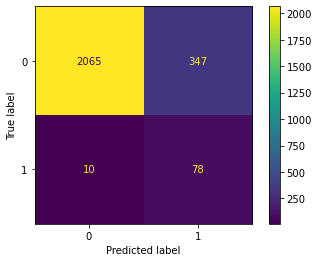

In [65]:
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)

cv_nb = cross_val_score(estimator=nb_model, X=X_train, y =y_train.ravel(), cv=10)
print("Cross Validation Score for Naive Bayes Model: ", cv_nb.mean())

nb_accuracy_train = accuracy_score(y_train, nb_model.predict(X_train))
print(f"Accuracy with Training data: {nb_accuracy_train}")

nb_y_pred = nb_model.predict(X_test)
nb_accuracy_test = accuracy_score(y_test, nb_y_pred)
print(f"Accuracy with test data: {nb_accuracy_test}")


print("Confusion Matrix for Naive Bayes Model: ")
cm_nb = confusion_matrix(y_test, nb_y_pred)
print(cm_nb)
print("Classification Report for Naive Bayes model: ")
print(classification_report(y_test, nb_y_pred))

disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb, display_labels=nb_model.classes_)
disp.plot()

tp_nb = cm_nb[0,0]
fp_nb = cm_nb[0,1]
tn_nb = cm_nb[1,1]
fn_nb = cm_nb[1,0]

#### Measuring The Error and Comparing Metrics

In [66]:
models = [
    ('Logistic Regression', tp_lr, fp_lr, tn_lr, fn_lr, lr_accuracy_train, lr_accuracy_test, cv_lr.mean()),
    ('Naive Bayes', tp_nb, fp_nb, tn_nb, fn_nb, nb_accuracy_train, nb_accuracy_test, cv_nb.mean()),
    ('Random Forest', tp_rf, fp_rf, tn_rf, fn_rf, rf_accuracy_train, rf_accuracy_test, cv_rf.mean(),)
]
predict = pd.DataFrame(data = models, columns=['Model', 'True Positive', 'False Positive', 'True Negative',
                                               'False Negative', 'Accuracy(training)', 'Accuracy(test)',
                                               'Cross-Validation'])

predict.T

,0,1,2
Model,Logistic Regression,Naive Bayes,Random Forest
True Positive,2109,2065,2130
False Positive,303,347,282
True Negative,76,78,73
False Negative,12,10,15
Accuracy(training),0.886768,0.879118,0.906685
Accuracy(test),0.874,0.8572,0.8812
Cross-Validation,0.886699,0.878773,0.899518


#### Using GridSearchCV to Propose optimal values for the depth and number of trees in the random forest

In [67]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
param_grid = {
    "n_estimators": [500, 600, 1000],
    "max_depth": [6, 8],
}

rf_model = RandomForestClassifier(
    random_state=6,
    )
    
kfold = StratifiedKFold(n_splits=10, shuffle=True, random_state=6)

grid_search = GridSearchCV(rf_model, param_grid, n_jobs=-1, cv=kfold)
new_rf_model = grid_search.fit(X_train, y_train)


In [68]:
best_rf_results = new_rf_model.best_params_
print(best_rf_results)

{'max_depth': 8, 'n_estimators': 300}


Cross Validation Score for RandomForest Classifier Model:  0.9168849069607168
Accuracy with Training data: 0.9286009648518263
Accuracy with test data: 0.8884
Confusion Matrix for RandomForest Classifier Model: 
[[2130  282]
 [  15   73]]
Classification Report for RandomForest Classifier model: 
              precision    recall  f1-score   support

           0       0.99      0.89      0.94      2412
           1       0.22      0.83      0.34        88

    accuracy                           0.89      2500
   macro avg       0.60      0.86      0.64      2500
weighted avg       0.97      0.89      0.92      2500



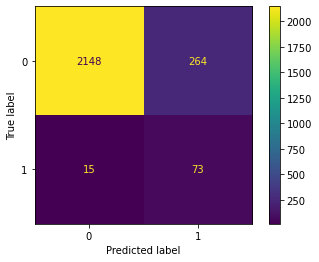

In [69]:
new_rf_model = RandomForestClassifier(
    n_estimators=best_rf_results["n_estimators"],
    max_depth=best_rf_results["max_depth"],
    random_state=6,
    )

new_rf_model.fit(X_train, y_train)


new_cv_rf = cross_val_score(estimator=new_rf_model, X=X_train, y =y_train.ravel(), cv=10)
print("Cross Validation Score for RandomForest Classifier Model: ", new_cv_rf.mean())

new_rf_accuracy_train = accuracy_score(y_train, new_rf_model.predict(X_train))
print(f"Accuracy with Training data: {new_rf_accuracy_train}")

new_rf_y_pred = new_rf_model.predict(X_test)
new_rf_accuracy_test = accuracy_score(y_test, new_rf_y_pred)
print(f"Accuracy with test data: {new_rf_accuracy_test}")


print("Confusion Matrix for RandomForest Classifier Model: ")
new_cm_rf = confusion_matrix(y_test, new_rf_y_pred)
print(cm_rf)
print("Classification Report for RandomForest Classifier model: ")
print(classification_report(y_test, new_rf_y_pred))

disp = ConfusionMatrixDisplay(confusion_matrix=new_cm_rf, display_labels=new_rf_model.classes_)
disp.plot()


new_tp_rf = new_cm_rf[0,0]
new_fp_rf = new_cm_rf[0,1]
new_tn_rf = new_cm_rf[1,1]
new_fn_rf = new_cm_rf[1,0]

In [70]:
models = [
    ('Logistic Regression', tp_lr, fp_lr, tn_lr, fn_lr, lr_accuracy_train, lr_accuracy_test, cv_lr.mean()),
    ('Naive Bayes', tp_nb, fp_nb, tn_nb, fn_nb, nb_accuracy_train, nb_accuracy_test, cv_nb.mean()),
    ('Random Forest (Before Improvement)', tp_rf, fp_rf, tn_rf, fn_rf, rf_accuracy_train, rf_accuracy_test, cv_rf.mean()),
    ('Random Forest (After Improvement)', new_tp_rf, new_fp_rf, new_tn_rf, new_fn_rf, new_rf_accuracy_train, new_rf_accuracy_test, new_cv_rf.mean()),
    
]
predict = pd.DataFrame(data = models, columns=['Model', 'True Positive', 'False Positive', 'True Negative',
                                               'False Negative', 'Accuracy(training)', 'Accuracy(test)',
                                               'Cross-Validation'])

predict.T

,0,1,2,3
Model,Logistic Regression,Naive Bayes,Random Forest (Before Improvement),Random Forest (After Improvement)
True Positive,2109,2065,2130,2148
False Positive,303,347,282,264
True Negative,76,78,73,73
False Negative,12,10,15,15
Accuracy(training),0.886768,0.879118,0.906685,0.928601
Accuracy(test),0.874,0.8572,0.8812,0.8884
Cross-Validation,0.886699,0.878773,0.899518,0.916885


### Visualizing Models Performance

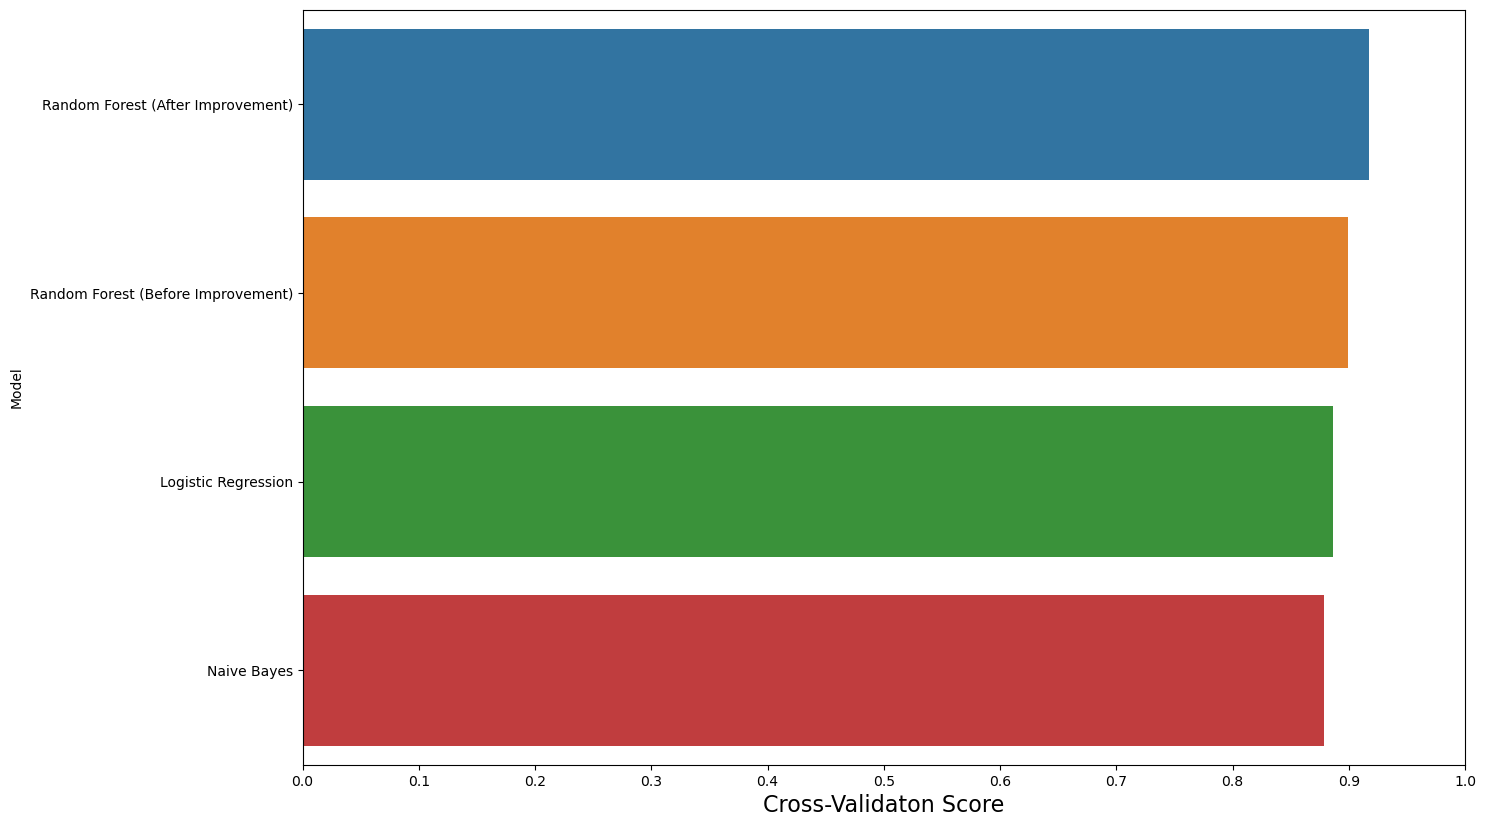

In [78]:
f, axe = plt.subplots(1,1, figsize=(15,10),dpi=100)

predict.sort_values(by=['Cross-Validation'], ascending=False, inplace=True)

sns.barplot(x='Cross-Validation', y='Model', data = predict, ax = axe)
#axes[0].set(xlabel='Region', ylabel='Charges')
axe.set_xlabel('Cross-Validaton Score', size=16)
axe.set_ylabel('Model')
axe.set_xlim(0,1.0)
axe.set_xticks(np.arange(0, 1.1, 0.1))
plt.show()


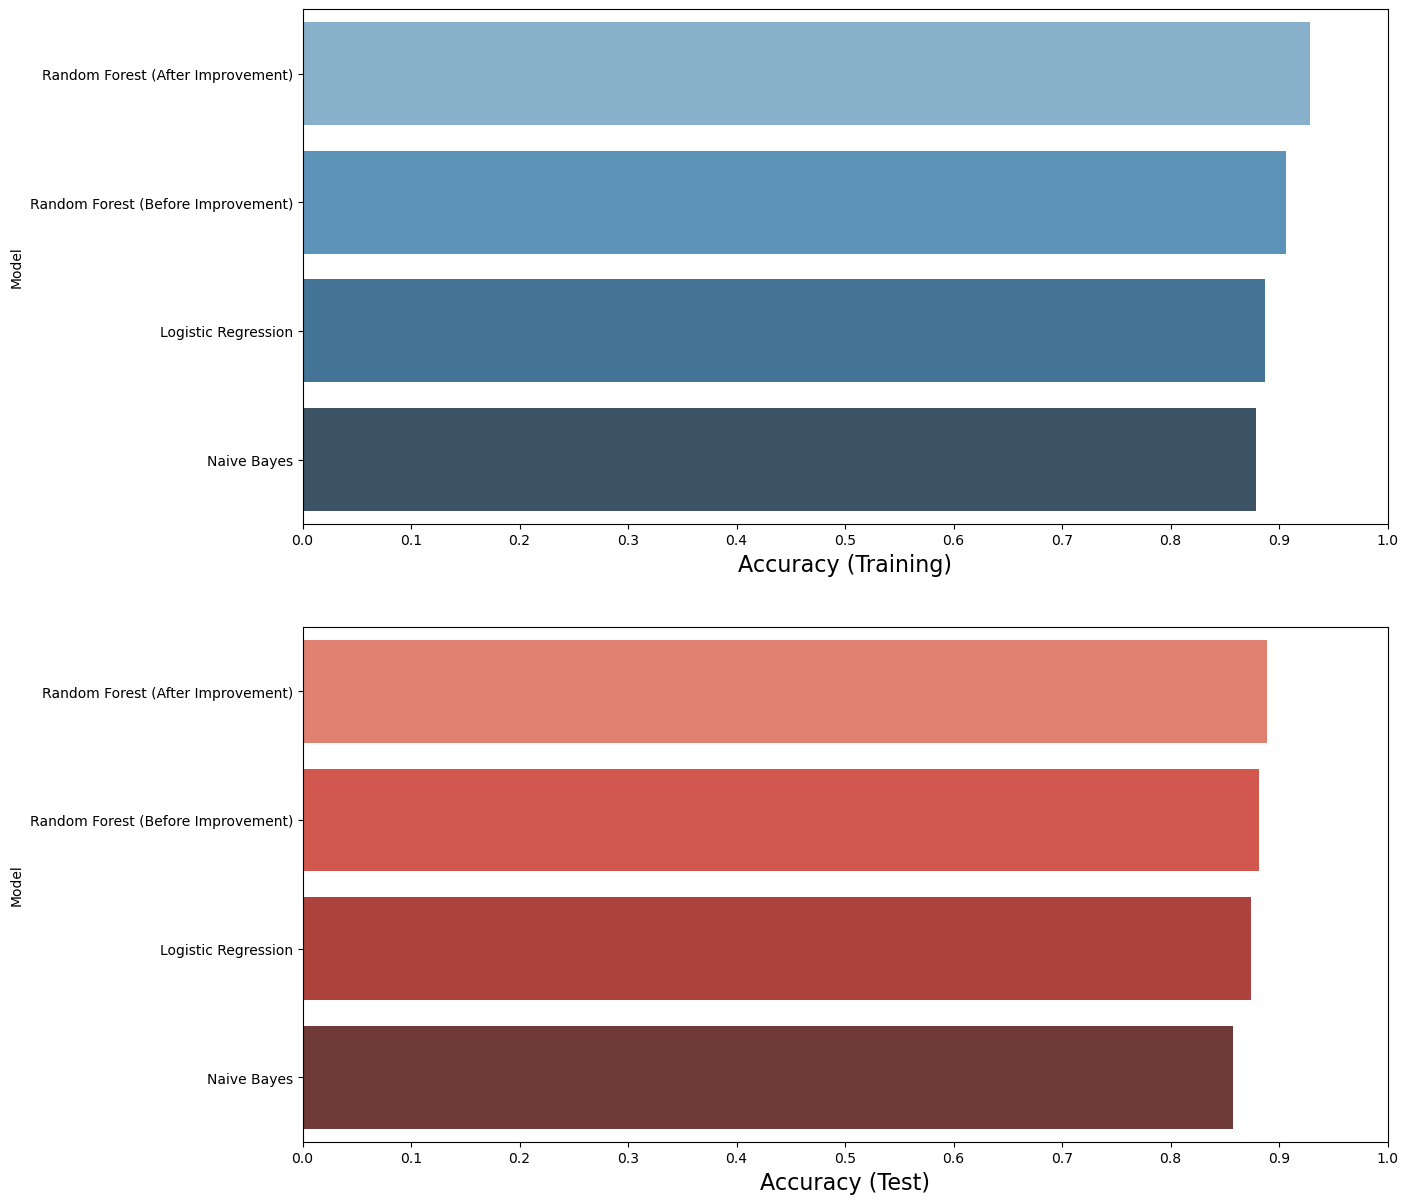

In [72]:
f, axes = plt.subplots(2,1, figsize=(14,15),dpi=100)

predict.sort_values(by=['Accuracy(training)'], ascending=False, inplace=True)

sns.barplot(x='Accuracy(training)', y='Model', data = predict, palette='Blues_d', ax = axes[0])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[0].set_xlabel('Accuracy (Training)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,1.0)
axes[0].set_xticks(np.arange(0, 1.1, 0.1))

predict.sort_values(by=['Accuracy(test)'], ascending=False, inplace=True)

sns.barplot(x='Accuracy(test)', y='Model', data = predict, palette='Reds_d', ax = axes[1])
#axes[0].set(xlabel='Region', ylabel='Charges')
axes[1].set_xlabel('Accuracy (Test)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()


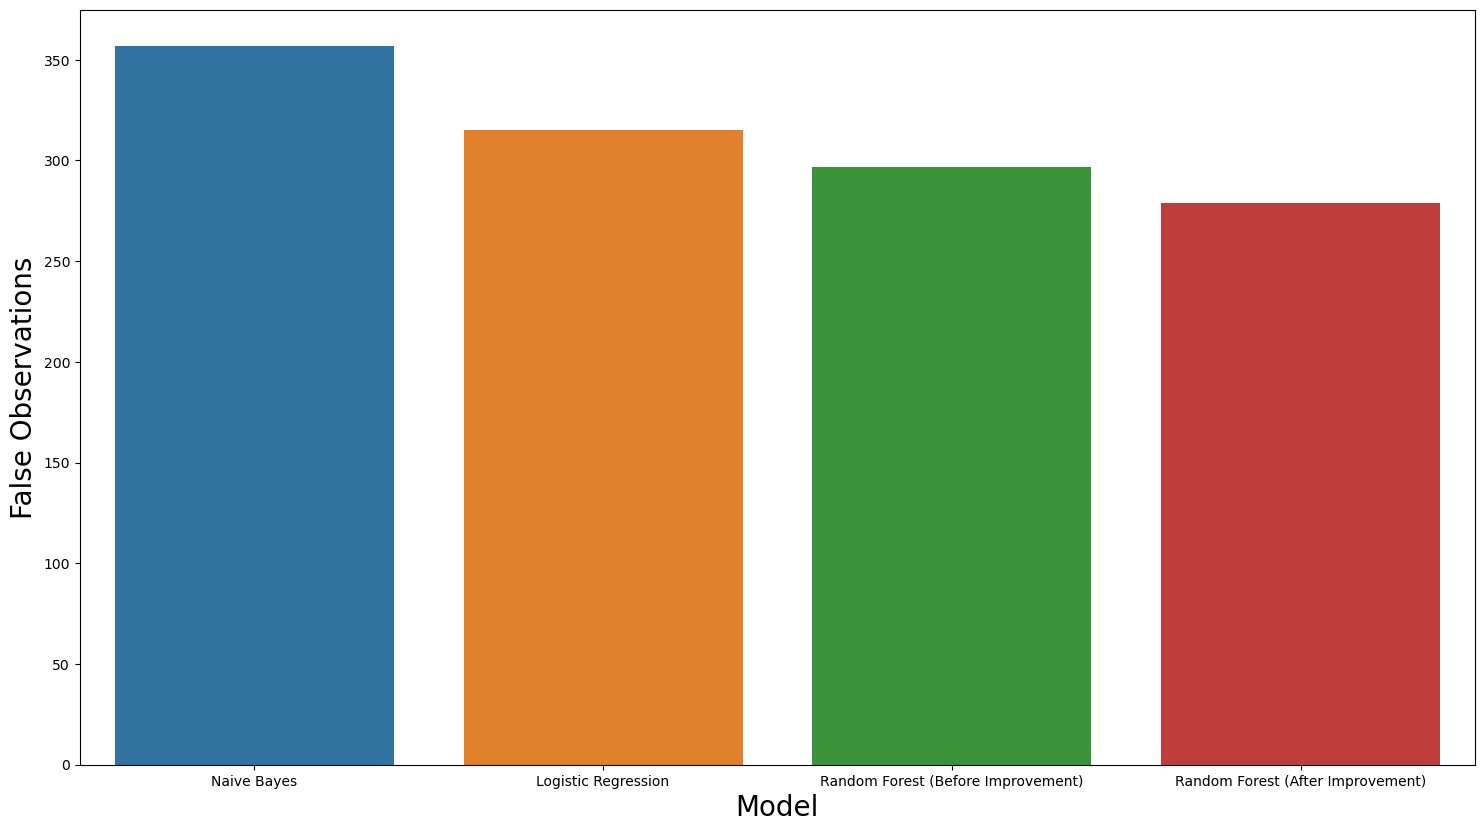

In [77]:
predict.sort_values(by=(['Accuracy(test)']), ascending=True, inplace=True)

f, axe = plt.subplots(1,1, figsize=(18,10), dpi=100)
sns.barplot(x = predict['Model'], y=predict['False Positive'] + predict['False Negative'], ax = axe)
axe.set_xlabel('Model', size=20)
axe.set_ylabel('False Observations', size=20)

plt.show()
